# Image Classification - Capstone Project

**Background**


As a final project of my Udacity Nanodegree Program I decided to go a bit deeper into Deep Learning and go through an exercise within Image Classification. As Udacity has a prepared project with Dog Breed classification as an option I decided to do my classification project within dog breeds as well. This said. I have not followed the prepared project that Udacity provided but instead structured my own way of doing it. 



* [Step 1](#step1): Load and prepare data
* [Step 2](#step2): Data Agumentation
* [Step 3](#step3): Create a CNN to Classify Dog Breeds
* [Step 4](#step4): Use a CNN to Classify Dog Breeds - Using Transfer Learning


**The data**

The data is downloaded from a Kaggle challenge but originates from Stanford and includes 120 different dog breeds within the over 20.000 images. For my work I will use about half of the available pictures (~10.000).  

**My Goals**

* Get an understanding of Tensorflow as a deep learning library
* Explore different options of data preperation for deep learning with Tensorflow
* Explore different options of data agumentation from deep learning with Tensorflow
* Create a Image Classifier using a Convolutional Neural Network from scratch
* Create a Image Classifier using a Convolutional Neural Network with the use of Transfer Learning

Okey. Lets get started and import some libraries needed for our work. 

**Import libraries**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.enable_eager_execution()


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Step 0 - Load and prepare data

In [3]:
dog_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566638124&Signature=mjLdvquKoA1aXJYkUbn3OxM4m4kwqs5fdrUwAZubOEuKr8n23XG61FXXwnq7ZPAOC5kWZvEc4Fma%2BQnOlumV0R%2BoKVw0ahz6b%2BSXsthzziUV50fRilnNeGe8GexpAZrT5vPy2GmvzQ27VfkIRTdandQFAeJ%2BenF5d%2FygKI6Dz5%2BjpfPNstvSbsY8mH4OVavzxhgXcDkUUvC%2BhBXR6zaBiR6Zk6Le2tKieTXGq1n1tVf2OrFzdZ5Pn834pnR88te95rQnYXdQN2dVWG0cKJTlXbAold5P5ZjJMBtDk0A4bickjyouyEI5%2F9DGXy%2FEeR5juH2oIy%2FoOvjnwQgwxe41QA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddog-breed-identification.zip'
zip_dir = tf.keras.utils.get_file('dog-breed-identification.zip', origin=dog_url, extract=True)

723329024/723322089 [==============================] - 7s 0us/step


Performing file/OS operations to place file in the right location on VM.

In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets


In [5]:
!unzip /root/.keras/datasets/train.zip
!cp /root/.keras/datasets/labels.csv /content
!mkdir validation
!ls

Archive:  /root/.keras/datasets/train.zip
   creating: train/
  inflating: train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: train/0067dc3eab0b3c3ef0439477624d85d6.jpg  
  inflating: train/00693b8bc2470375cc744a6391d397ec.jpg  
  inflating: train/006cc3ddb9dc1bd827479569fcdc52dc.jpg  
  inflating: train/0075dc49dab4024d12fafe67074d8a81.jpg  
  inflating: train/00792e341f3c6eb33663e415d0715370.jpg  
  inflatin

In [0]:
num_dogs_tr = len(os.listdir('train'))


In [7]:
print('total training dog images:', num_dogs_tr)

total training dog images: 10222


In [8]:
my_path = !pwd
my_path[0]

'/content'

In [9]:
#Creating a list of all paths to the images in the train folder
import pathlib

data_root = pathlib.Path(my_path[0])

all_image_paths = list(data_root.glob('train/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
image_count

10222

In [10]:
all_image_paths[:10]

['/content/train/d61a270df934b36a3d04fa329ffedc89.jpg',
 '/content/train/c5e1c138abd4747d63e52253263904b0.jpg',
 '/content/train/85bb4a7d4ace6c2464e7969b99403b0c.jpg',
 '/content/train/e827550ea6ab19bbd4916d9952ee8765.jpg',
 '/content/train/3b266adc845e74ee438f2a67e57938d1.jpg',
 '/content/train/941dff46bad4b57495199709b7ab04b5.jpg',
 '/content/train/731ae3872320fb542555565038ae573f.jpg',
 '/content/train/2c55080777e6a4d52cddbd370611af06.jpg',
 '/content/train/de01c11dfd88085d19b336a812a1795d.jpg',
 '/content/train/dc07c140b26ba8f2c75770f00229270b.jpg']

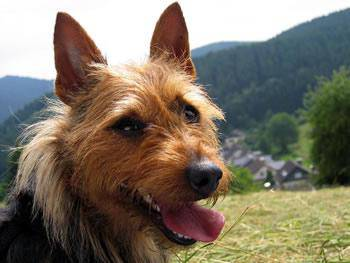

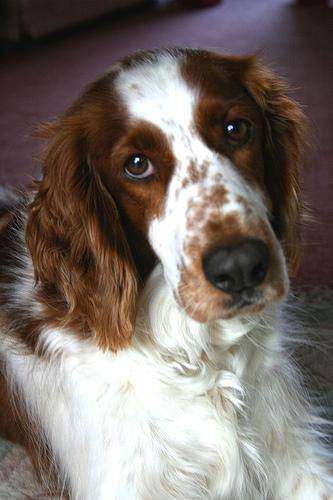

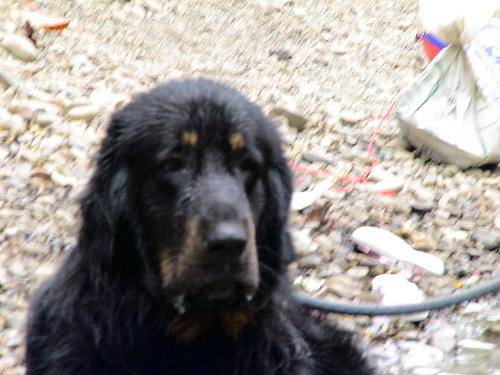

In [11]:
#Look at three random images from the training set
import IPython.display as display
import random

for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print()

In [12]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
dog_class = list(labels['breed'].unique())
dog_class.sort()

In [14]:
dog_class[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

In [0]:
#Create a dictionary with the name of the dogs with a corresponding number
label_to_index = dict((name, index) for index,name in enumerate(dog_class))


In [0]:
#Loop through label dataframe and create a list of labels matching 'all_image_paths'
label_list = []
for img_path in all_image_paths :
  image = img_path[15:-4]
  breed = labels[labels['id'] == image]['breed'].values[0]
  index = label_to_index[breed]
  label_list.append(index)

In [17]:
print("First 10 labels indices: ", label_list[:10])

First 10 labels indices:  [26, 91, 21, 52, 61, 100, 89, 102, 56, 61]


In [18]:
img_path = all_image_paths[0]
img_path

'/content/train/d61a270df934b36a3d04fa329ffedc89.jpg'

In [0]:
#function to pre-process the images
def pre_process_image(image):
  final_image = tf.image.decode_jpeg(image, channels=3)
  final_image = tf.image.resize(final_image, [224, 224])
  final_image /=255.0
  
  return final_image

In [0]:
#function to load, read the images and use pre-process function
def load_and_process(image):
  image = tf.read_file(image)
  return pre_process_image(image)

**Create TF Dataset**

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [22]:
print(path_ds)

<DatasetV1Adapter shapes: (), types: tf.string>


In [0]:
image_ds = path_ds.map(load_and_process, num_parallel_calls=AUTOTUNE)

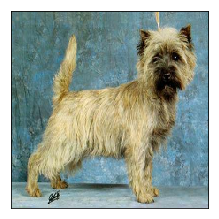

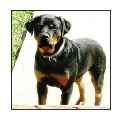

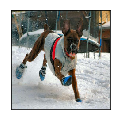

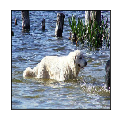

In [24]:
plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.show()

**A dataset of (image, label) pairs**

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(label_list, tf.int64))

In [26]:
for label in label_ds.take(10):
  print(dog_class[label.numpy()])

cairn
rottweiler
boxer
great_pyrenees
japanese_spaniel
shih-tzu
redbone
silky_terrier
irish_setter
japanese_spaniel


In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [28]:
print(image_label_ds)

<DatasetV1Adapter shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int64)>


## Step 2: Data Agumentation

## Step 3: Create a CNN to Classify Dog Breeds - From Scratch

In [0]:
#BATCH_SIZE = 32

In [30]:

#ds = image_label_ds.apply(
#  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
#ds = ds.batch(BATCH_SIZE)
#ds = ds.prefetch(buffer_size=AUTOTUNE)
#ds

W0821 15:26:18.611071 139756598167424 deprecation.py:323] From <ipython-input-30-0255800360e7>:3: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<DatasetV1Adapter shapes: ((?, 224, 224, 3), (?,)), types: (tf.float32, tf.int64)>

In [30]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 224, 224, 3), (?,)), types: (tf.float32, tf.int64)>

In [0]:
DATASET_SIZE = 10222

In [0]:
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

In [0]:
train_dataset = ds.take(train_size)
test_dataset = ds.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

In [35]:
val_dataset

<DatasetV1Adapter shapes: ((?, 224, 224, 3), (?,)), types: (tf.float32, tf.int64)>

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [39]:
batch_size=32
model_results = model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=3,
          steps_per_epoch=tf.ceil(len(all_image_paths)/BATCH_SIZE).numpy(),
          verbose=1,
          #validation_steps=32                
          validation_steps=int(np.ceil(val_size / float(batch_size)))
         )

Epoch 1/3


W0821 16:05:51.566897 140299821201280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


320/320 [==============================] - 272s 851ms/step - loss: 4.7877 - acc: 0.0100 - val_loss: 4.7807 - val_acc: 0.0280
Epoch 2/3
320/320 [==============================] - 257s 804ms/step - loss: 4.6886 - acc: 0.0191 - val_loss: 4.4931 - val_acc: 0.0299
Epoch 3/3
320/320 [==============================] - 258s 808ms/step - loss: 4.4489 - acc: 0.0377 - val_loss: 4.1734 - val_acc: 0.0807


In [46]:
model.evaluate(
    x=test_dataset,
    verbose=1
)

1533/1533 [==============================] - 256s 167ms/step - loss: 0.0101 - acc: 0.9992


[0.010130998566049041, 0.9992254]

## Step 4: Use a CNN to Classify Dog Breeds - Using Transfer Learning